# Import Libraries

In [33]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sbn
from sklearn.preprocessing import LabelBinarizer
import cv2
import numpy as np
from sklearn.metrics import accuracy_score


# Loading MNISt Dataset

In [34]:
test = pd.read_csv("E://Downloads//archive (3)//sign_mnist_test.csv")
train = pd.read_csv("E://Downloads//archive (3)//sign_mnist_train.csv")
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [35]:
train.shape,test.shape

((27455, 785), (7172, 785))

C:\Users\Pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

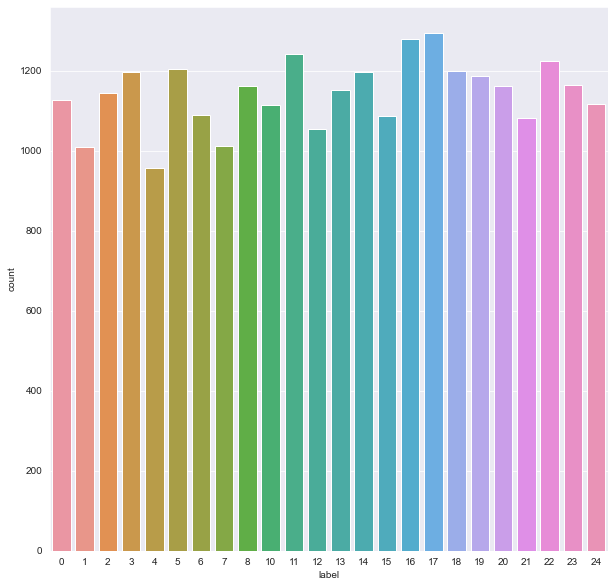

In [36]:
plt.figure(figsize = (10,10)) # Label Count
sbn.set_style("darkgrid")
sbn.countplot(train['label'])

# Splitting

In [37]:
y_train =train['label']
y_test =test['label']
x_train=train.drop('label',axis=1)
x_test=test.drop('label',axis=1)

In [38]:
#normalization
x_train = x_train / 255
x_test = x_test / 255

In [39]:
class_labels = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 10:'K', 11:'L', 12:'M', 
               13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y',}
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I','J' ,'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [40]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

# Visualization 

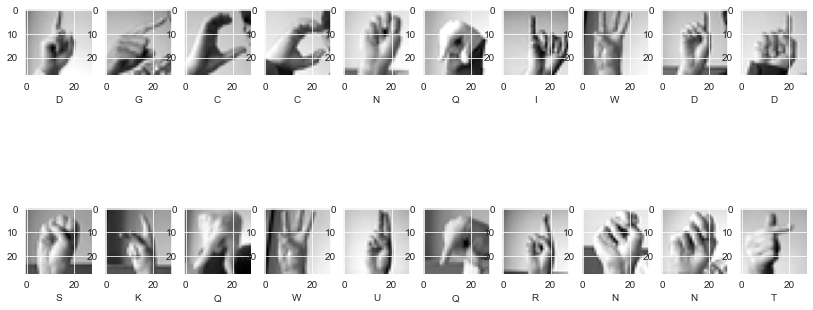

In [41]:
plt.figure(figsize=(14,14))
x, y = 10, 4 
for i in range(20):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape(28,28),cmap='gray' )
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [42]:
lb=LabelBinarizer()
y_train=lb.fit_transform(y_train)
y_test=lb.fit_transform(y_test)

# Enhancement

In [43]:
# Apply histogram equalization
def apply_histogram_equalization(image_array):
    equalized_images = []
    for image in image_array:
        # Rescale image values to range [0, 255]
        image_rescaled = (image - np.min(image)) * (255 / (np.max(image) - np.min(image)))
        
        # Convert image to uint8
        image_rescaled = np.uint8(image_rescaled)

        # Apply histogram equalization
        equalized = cv2.equalizeHist(image_rescaled)

        equalized_images.append(equalized)
    return np.array(equalized_images)

# Apply histogram equalization on x_train
x_train_equalized = apply_histogram_equalization(x_train)

# Apply histogram equalization on x_test
x_test_equalized = apply_histogram_equalization(x_test)


# Display Hand Gestures

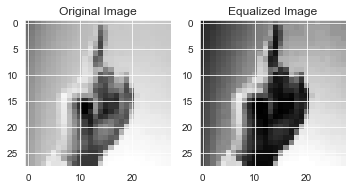

In [44]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(5, 5))

# Display original image (x_train[0])
axes[0].imshow(x_train[0].reshape(28, 28), cmap='gray')
axes[0].set_title('Original Image')

# Display equalized image (x_train_equalized[0])
axes[1].imshow(x_train_equalized[0].reshape(28, 28), cmap='gray')
axes[1].set_title('Equalized Image')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


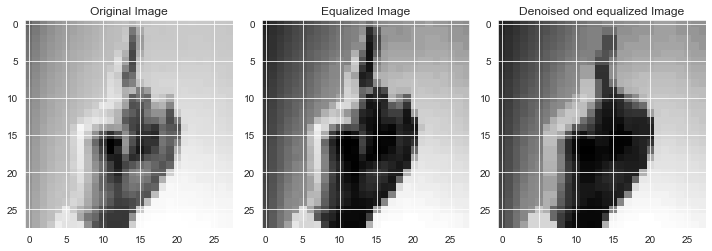

In [45]:
# Apply noise removal using median filter
def remove_noise(image_array):
    denoised_images = []
    for image in image_array:
        # Convert image to uint8
        image = np.uint8(image)

        # Apply median filter
        denoised = cv2.medianBlur(image, 3)
        denoised_images.append(denoised)
    return np.array(denoised_images)

# Apply noise removal on x_train
x_train_denoised = remove_noise(x_train_equalized)

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# Original image (x_train[0])
axes[0].imshow(x_train[0].reshape(28, 28), cmap='gray')
axes[0].set_title('Original Image')

# Denoised image (x_train_denoised[0])
axes[2].imshow(x_train_denoised[0].reshape(28, 28), cmap='gray')
axes[2].set_title('Denoised ond equalized Image')

# Equalized image (x_train_equalized[0])
axes[1].imshow(x_train_equalized[0].reshape(28, 28), cmap='gray')
axes[1].set_title('Equalized Image')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

# Segmentation

In [46]:
# Apply thresholding for image segmentation
def segment_image_threshold(image_array, threshold):
    segmented_images = []
    for image in image_array:
        # Convert image to uint8
        image = np.uint8(image)

        # Apply thresholding
        _, segmented = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)

        # Invert the segmented image
        segmented = cv2.bitwise_not(segmented)

        segmented_images.append(segmented)
    return np.array(segmented_images)

# Set the threshold value
threshold = 50
x_train_segmented = segment_image_threshold(x_train_equalized, threshold)
# Apply thresholding on x_train_equalized
x_test_segmented = segment_image_threshold(x_test_equalized, threshold)

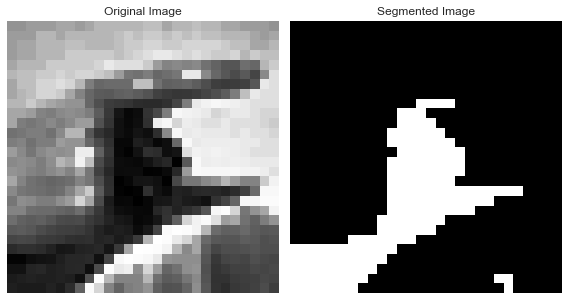

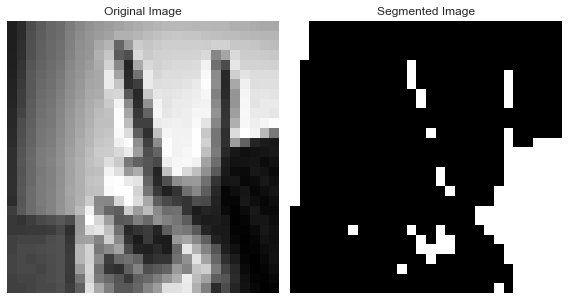

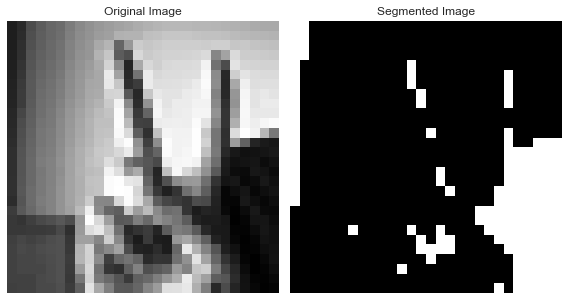

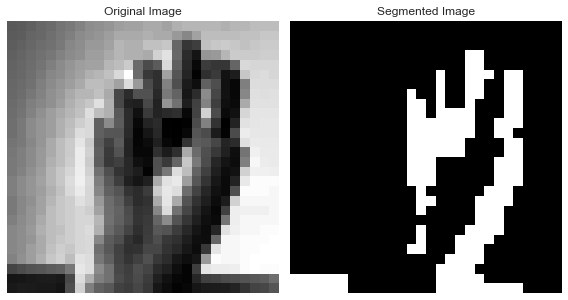

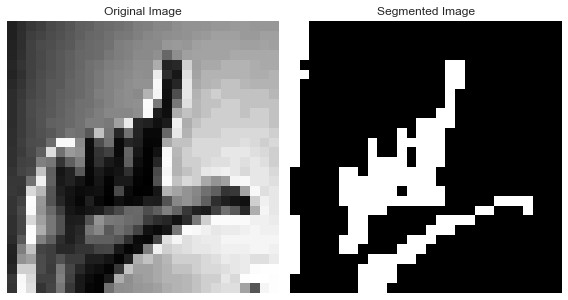

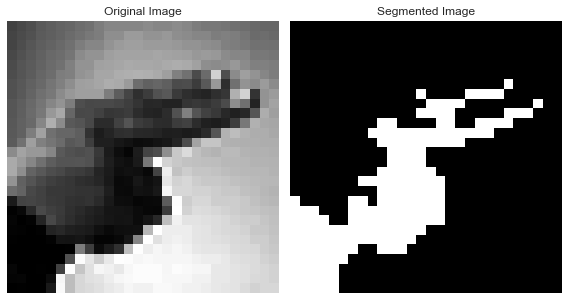

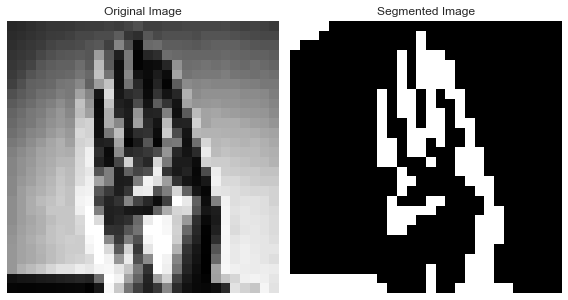

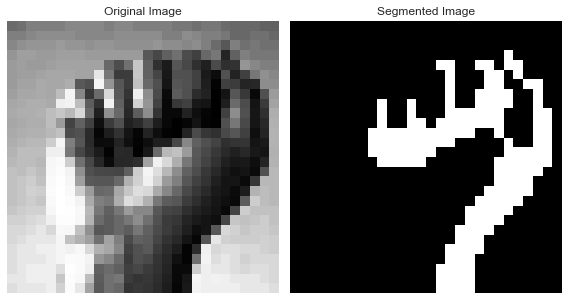

In [47]:
for i in range(10):
    index = i * 900
    if index < len(x_test_equalized):
        plt.figure(figsize=[8, 5])
        plt.subplot(1, 2, 1)
        plt.imshow(x_test_equalized[index].reshape(28, 28), cmap=plt.cm.gray)
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(x_test_segmented[index].reshape(28, 28), cmap='gray')
        plt.title('Segmented Image')
        plt.axis('off')

        plt.tight_layout()
        plt.show()


In [48]:
x_train_flattened = x_train_segmented.reshape(len(x_train_segmented), -1)
x_test_flattened = x_test_segmented.reshape(len(x_test_segmented), -1)


In [49]:
# Prepare the training data
x_train = x_train_flattened
x_test = x_test_flattened


# KNN model

In [50]:
# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=1)  # Example parameter, adjust as needed
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test_flattened)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 77.24%


# Loading Hand_Gestures Dataset

In [52]:
path_to_train_data = "E://Downloads//Hand Gestures dataset//Hand Gestures dataset//train"
train_dirs = []
for entry in os.scandir(path_to_train_data):
    if entry.is_dir():
        train_dirs.append(entry.path)
        
for train_dir in train_dirs:
    print(train_dir)

E://Downloads//Hand Gestures dataset//Hand Gestures dataset//train\0
E://Downloads//Hand Gestures dataset//Hand Gestures dataset//train\1
E://Downloads//Hand Gestures dataset//Hand Gestures dataset//train\10
E://Downloads//Hand Gestures dataset//Hand Gestures dataset//train\11
E://Downloads//Hand Gestures dataset//Hand Gestures dataset//train\12
E://Downloads//Hand Gestures dataset//Hand Gestures dataset//train\13
E://Downloads//Hand Gestures dataset//Hand Gestures dataset//train\14
E://Downloads//Hand Gestures dataset//Hand Gestures dataset//train\15
E://Downloads//Hand Gestures dataset//Hand Gestures dataset//train\16
E://Downloads//Hand Gestures dataset//Hand Gestures dataset//train\17
E://Downloads//Hand Gestures dataset//Hand Gestures dataset//train\18
E://Downloads//Hand Gestures dataset//Hand Gestures dataset//train\19
E://Downloads//Hand Gestures dataset//Hand Gestures dataset//train\2
E://Downloads//Hand Gestures dataset//Hand Gestures dataset//train\3
E://Downloads//Hand Gest

In [53]:
X = []
y = []
d = range(20)
for train_dir in train_dirs:
    train = train_dir.split('\\')[-1]
    for training_image in os.scandir(train_dir):
        img1 = cv2.imread(training_image.path)
        X.append(img1)
        y.append(d[int(train)])

y = np.array(y)          
X = np.array(X)

# Visualization

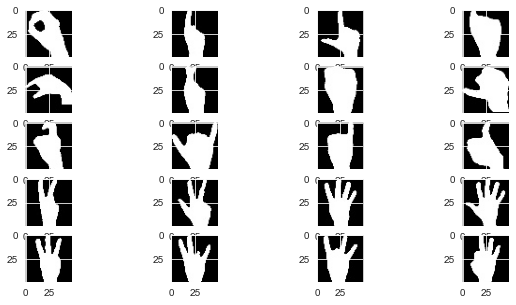

In [54]:
fig, ax = plt.subplots(5,4,figsize=(10, 5))
gesture = 0 
for i in range(5):
    for j in range(4):
        ax[i,j].imshow(X[gesture])
        gesture += 900
        
    

# Splitting

In [55]:
print(X.shape)
print(y.shape)
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.20, random_state = 99)


(18000, 50, 50, 3)
(18000,)


In [56]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14400, 50, 50, 3)
(3600, 50, 50, 3)
(14400,)
(3600,)


# PCA

In [57]:
X_train = X_train.reshape(14400,7500)
X_test = X_test.reshape(3600,7500)
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

In [58]:
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_scaler)
X_test_pca = pca.fit_transform(X_test_scaler)
print(X_train_pca.shape,X_test_pca.shape)

(14400, 20) (3600, 20)


# KNN model

In [59]:
KNN = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
KNN.fit(X_train_pca,y_train)
y_pred=KNN.predict(X_test_pca)
print(accuracy_score(y_pred,y_test)*100, "%")

97.75 %
